In [ ]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/DA/dataset_classifier/training'
val_path = '/content/drive/MyDrive/DA/dataset_classifier/validation'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
val_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(40, 40),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(40, 40),
    batch_size=32,
    class_mode='categorical'
)

Found 1944 images belonging to 10 classes.
Found 699 images belonging to 10 classes.


In [ ]:
class_names = train_generator.class_indices

print(class_names)

{'fruit-bores': 0, 'grasshopper': 1, 'leafroller': 2, 'maybug': 3, 'mealybug-disease': 4, 'moth': 5, 'red-spider': 6, 'snail': 7, 'stag-beetle': 8, 'stinkbug': 9}


In [ ]:
WIDTH = 40
HEIGHT = 40
EPOCHS = 32 #Số lần lặp lại qua toàn bộ tập dữ liệu huấn luyện.

model = Sequential()

model.add(Convolution2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(WIDTH, HEIGHT, 3)))
model.add(MaxPooling2D(strides=2))
model.add(Convolution2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(len(class_names), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

model.fit(train_generator, validation_data=val_generator, batch_size=56, epochs=EPOCHS, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 40, 40, 32)        2432      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 20, 20, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 48)        38448     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 48)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 256)              

In [ ]:
model.save("cnn_lenet.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
!pip install h5py

In [ ]:
from keras.models import load_model

model_path = '/content/cnn_lenet.h5'

1/1 [==============================] - 0s 31ms/step
Predicted class: fruit-bores
Class probabilities: [4.7442988e-01 3.4035433e-02 2.8370002e-01 4.9568702e-02 1.5529442e-01
 7.9662702e-04 2.7165870e-04 6.3270825e-04 4.3487576e-05 1.2271167e-03]


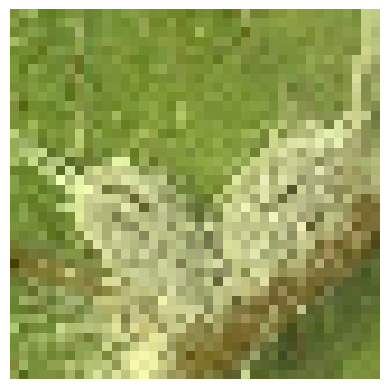

In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
import matplotlib.pyplot as plt

def predict_and_verify(model, class_names, image_path):
    global WIDTH
    global HEIGHT

    img = image.load_img(image_path, target_size=(WIDTH, HEIGHT))  # Thay đổi kích thước theo kiến trúc LeNet

    # Chuyển ảnh thành mảng NumPy
    img_array = image.img_to_array(img)

    # Chuẩn hóa giá trị pixel về khoảng [0, 1]
    img_array /= 255.0

    # Thêm một chiều để tạo thành batch (nếu cần)
    img_array = np.expand_dims(img_array, axis=0)

    # Dự đoán lớp của ảnh
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = list(class_names.keys())[predicted_class_index]

    # In ra kết quả dự đoán và xác suất của các lớp
    print(f"Predicted class: {predicted_class_name}")
    print(f"Class probabilities: {predictions[0]}")

    # Hiển thị ảnh để kiểm tra
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Sử dụng hàm để dự đoán và xác minh kết quả
image_path_to_verify = '/content/drive/MyDrive/DA/Test/rep_sap/mealybug-disease_18.jpg'
# predict_and_verify(model, train_generator.class_indices, image_path_to_verify)
class_names = {
    'fruit-bores': 0,
    'grasshopper': 1,
    'leafroller': 2,
    'maybug': 3,
    'mealybug-disease': 4,
    'moth': 5,
    'red-spider': 6,
    'snail': 7,
    'stag-beetle': 8,
    'stinkbug': 9
}
predict_and_verify(model, class_names, image_path_to_verify)